In [2]:
import sympy as sym
import numpy as np
sym.init_printing()
from IPython.display import display,Math
from sympy.abc import x,y
import math
from math import gcd
x,y = sym.symbols('x,y')
import matplotlib.pyplot as plt
import sympy.plotting.plot as symplot
x,a = sym.symbols('x,a')
from matplotlib.patches import Polygon
from matplotlib import pyplot as plt
import cmath as cm
import scipy as sp
from scipy.signal import find_peaks
import seaborn as sns
from plotly.subplots import make_subplots
from plotly import graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import toeplitz
from PIL import Image
import pandas as pd
from scipy.stats import rankdata
from sklearn.preprocessing import MinMaxScaler
import sys
import sklearn
from scipy.sparse import csr_matrix 

$$ \sqrt{Y} = X \rightarrow Y = X^2 $$
 
$$ Y = (x + \epsilon)^2 $$
 
$$ \text{Small x will iteratively get closer to big X, and epsilon (error) will get smaller} $$
$$ \text{I want to isolate }\epsilon $$
 
$$  Y = (x + \epsilon)^2 = (x + \epsilon)(x + \epsilon) = x^2 + \epsilon^2 + 2x\epsilon $$
$$ Y - x^2 = \epsilon^2 + 2x\epsilon = (\epsilon + 2x)\epsilon $$
 
$$ \text{We assume the }\epsilon \text{ inside the parenthesis is to small when compared to 2x, so we ignore it} $$
 
$$ \frac{Y-x^2}{2x} \approx \epsilon $$
 
--------------------------------------------------------------------------------------------------------------------
 
$$\text{Now considering this 2 equations}$$
 
$$ Y = (x + \epsilon)^2 \text{ and }\frac{Y-x^2}{2x} \approx \epsilon $$
 
$$ \text{we replace }\epsilon\text{ in the first equation with the result of the second equation} $$
 
$$ \text{We get } X \approx x + \frac{Y - x^2}{2x} $$
 
$$ \text{The algorithm works by iterating big X turns into small x at the next iteration} $$
$$ x \leftarrow x +  \frac{Y - x^2}{2x} $$
 
$$ \text{we can simplify this iteration math in the following way} $$
 
$$ x \leftarrow \frac{2x^2}{2x} + \frac{Y-x^2}{2x} $$
$$ x \leftarrow \frac{x^2 + Y}{2x} $$
 
$$ x \leftarrow \frac{x + \frac{Y}{x}}{2} $$

In [3]:
Y = 100

x = Y/3

for n in range(5):
    x = (x+Y/x)/2

x

In [4]:
Y = 100

x = Y/3

for n in range(5):
    print(x)
    x = (x+Y/x)/2

x

33.333333333333336
18.166666666666668
11.835626911314986
10.142346754539993
10.000998910755985


In [5]:
num2sqrt = np.linspace(2,101,50)
num2sqrt

array([  2.        ,   4.02040816,   6.04081633,   8.06122449,
        10.08163265,  12.10204082,  14.12244898,  16.14285714,
        18.16326531,  20.18367347,  22.20408163,  24.2244898 ,
        26.24489796,  28.26530612,  30.28571429,  32.30612245,
        34.32653061,  36.34693878,  38.36734694,  40.3877551 ,
        42.40816327,  44.42857143,  46.44897959,  48.46938776,
        50.48979592,  52.51020408,  54.53061224,  56.55102041,
        58.57142857,  60.59183673,  62.6122449 ,  64.63265306,
        66.65306122,  68.67346939,  70.69387755,  72.71428571,
        74.73469388,  76.75510204,  78.7755102 ,  80.79591837,
        82.81632653,  84.83673469,  86.85714286,  88.87755102,
        90.89795918,  92.91836735,  94.93877551,  96.95918367,
        98.97959184, 101.        ])

In [6]:
nums2sqrt = np.linspace(2,101,50)

niterations = np.arange(3,9)

for ni,num in enumerate(nums2sqrt):
    print(ni,num)

0 2.0
1 4.020408163265306
2 6.040816326530612
3 8.061224489795919
4 10.081632653061224
5 12.102040816326529
6 14.122448979591836
7 16.142857142857142
8 18.163265306122447
9 20.183673469387752
10 22.204081632653057
11 24.224489795918366
12 26.24489795918367
13 28.265306122448976
14 30.285714285714285
15 32.30612244897959
16 34.326530612244895
17 36.3469387755102
18 38.367346938775505
19 40.38775510204081
20 42.408163265306115
21 44.42857142857142
22 46.44897959183673
23 48.469387755102034
24 50.48979591836734
25 52.51020408163265
26 54.53061224489795
27 56.55102040816326
28 58.57142857142857
29 60.59183673469387
30 62.61224489795918
31 64.63265306122449
32 66.65306122448979
33 68.67346938775509
34 70.6938775510204
35 72.71428571428571
36 74.73469387755101
37 76.75510204081633
38 78.77551020408163
39 80.79591836734693
40 82.81632653061223
41 84.83673469387755
42 86.85714285714285
43 88.87755102040815
44 90.89795918367346
45 92.91836734693877
46 94.93877551020407
47 96.95918367346938
48 9

In [7]:
nums2sqrt = np.linspace(2,101,50)
niterations = np.arange(3,9)

err = np.zeros((len(niterations),len(nums2sqrt)))

# Loop over numbers to square root
for ni,num in enumerate(nums2sqrt):

    # set the number to compute sqrt of
    Y = num

    # loop over the number of interations
    for ii,iters in enumerate(niterations):

        # Heron's algo
        x = Y/3 # initial guess
        for n in range(iters):
            x = (x + Y/x) /2

        # get the erroe
        err[ii,ni] = (x-np.sqrt(Y))

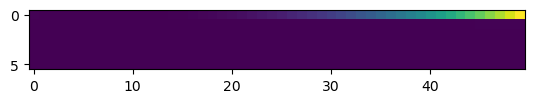

In [8]:
plt.imshow(err)

C:\Users\ghost\AppData\Local\Temp\ipykernel_9052\2542689970.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(-np.log(err))
C:\Users\ghost\AppData\Local\Temp\ipykernel_9052\2542689970.py:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(-np.log(err))


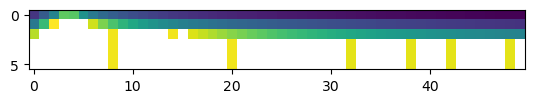

In [9]:
plt.imshow(-np.log(err))

C:\Users\ghost\AppData\Local\Temp\ipykernel_9052\3887493753.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(-np.log(err),aspect=10,extent=[nums2sqrt[0],nums2sqrt[-1],niterations[-1],niterations[0]])
C:\Users\ghost\AppData\Local\Temp\ipykernel_9052\3887493753.py:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(-np.log(err),aspect=10,extent=[nums2sqrt[0],nums2sqrt[-1],niterations[-1],niterations[0]])


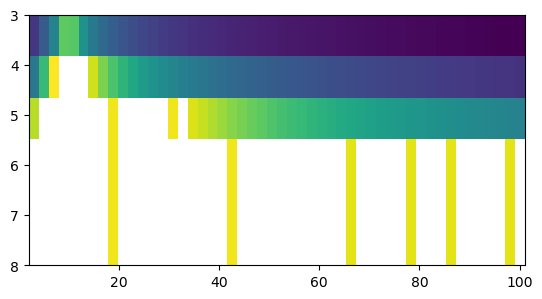

In [10]:
plt.imshow(-np.log(err),aspect=10,extent=[nums2sqrt[0],nums2sqrt[-1],niterations[-1],niterations[0]])
plt.show()

# Exercise : Heron's mosquito spaceship

In [11]:
num2sqr = 13
startEst = np.linspace(-num2sqr,num2sqr,40)

niters = 5

# Loop over numbers to square root
for idx,startnum in enumerate(startEst):

    # initialize start value
    x = startnum

    # Heron's algo
    x = num2sqr/3 # initial guess
    for n in range(iters):
        x = (x + num2sqr/x) /2

In [12]:
num2sqr = 13
startEst = np.linspace(-num2sqr,num2sqr,40)

niters = 5

# initialize a results matrix
sqrtAlgResults = np.zeros((len(startEst),niters+1))

# loop over starting estimates
for idx,startnum in enumerate(startEst):

    # initialize start value
    x = [startnum]

    # Heron's algo
    for n in range(niters):
        newx = (x[n] + num2sqr/x[n])/2
        x.append(newx)

    sqrtAlgResults[idx,:] = x

In [13]:
sqrtAlgResults

array([[-13.        ,  -7.        ,  -4.42857143,  -3.68202765,
         -3.60634549,  -3.60555136],
       [-12.33333333,  -6.69369369,  -4.3179101 ,  -3.66431293,
         -3.60602243,  -3.60555131],
       [-11.66666667,  -6.39047619,  -4.21237669,  -3.64926022,
         -3.60581304,  -3.60555128],
       [-11.        ,  -6.09090909,  -4.11261872,  -3.63681085,
         -3.60568562,  -3.60555128],
       [-10.33333333,  -5.79569892,  -4.0193708 ,  -3.62685394,
         -3.60561384,  -3.60555128],
       [ -9.66666667,  -5.50574713,  -3.93345811,  -3.61921901,
         -3.60557708,  -3.60555128],
       [ -9.        ,  -5.22222222,  -3.85579196,  -3.61367158,
         -3.6055604 ,  -3.60555128],
       [ -8.33333333,  -4.94666667,  -3.78734951,  -3.60991456,
         -3.60555391,  -3.60555128],
       [ -7.66666667,  -4.68115942,  -3.7291246 ,  -3.60759872,
         -3.60555186,  -3.60555128],
       [ -7.        ,  -4.42857143,  -3.68202765,  -3.60634549,
         -3.60555136,  -3.6

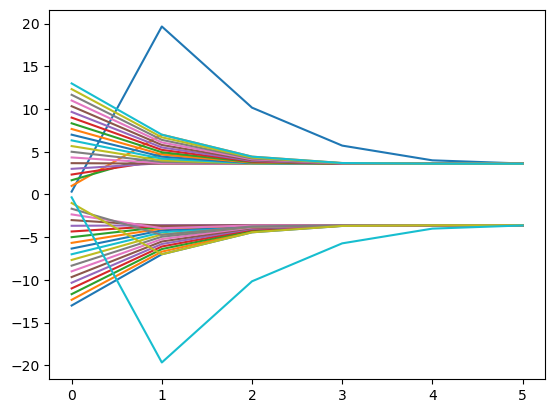

In [14]:
plt.plot(np.arange(niters+1),sqrtAlgResults.T)
plt.show()

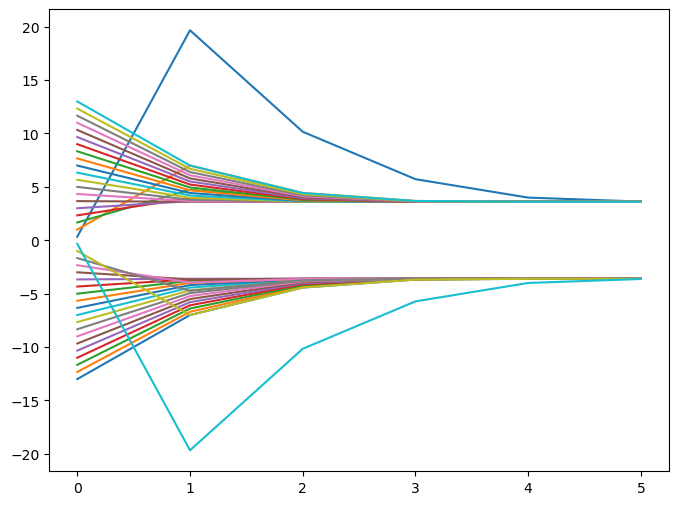

In [15]:
fig,ax = plt.subplots(1,figsize=(8,6))
plt.plot(np.arange(niters+1),sqrtAlgResults.T)
plt.show()